In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# I Exploratory Analysis

### Loading the train and test data sets

In [61]:
traindf = pd.read_csv('Data_Files/train.csv')
testdf = pd.read_csv('Data_Files/test.csv')

In [62]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Dropping Cabin column as there are large number of Missing values

In [64]:
traindf.drop(['Cabin'], axis=1, inplace=True)
testdf.drop(['Cabin'], axis=1, inplace=True)

In [65]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [66]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [67]:
traindf.shape

(891, 11)

In [68]:
testdf.shape

(418, 10)

### Making a copy of the target variable 'Survived' from Train

In [69]:
targets_sur = traindf.Survived
traindf.drop(['Survived'], 1, inplace=True)

### Combining Train and Test

In [70]:
combined = traindf.append(testdf)

In [71]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 112.5+ KB


### Addressing 'Fare' Column

In [72]:
combined[combined["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [73]:
df_temp=combined[(combined["Pclass"]==3)  & (combined["Sex"]=='male') & (combined["Embarked"]=='S') & (combined["SibSp"]==0) & (combined["Parch"]==0)]

In [74]:
combined['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [75]:
df_temp['Fare'].describe()

count    277.000000
mean       9.654567
std        8.439758
min        0.000000
25%        7.775000
50%        7.895800
75%        8.050000
max       56.495800
Name: Fare, dtype: float64

In [76]:
combined['Fare'] = combined['Fare'].fillna(df_temp['Fare'].median())

In [77]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 112.5+ KB


### Addressing 'Embarked' column

In [78]:
combined[combined["Embarked"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [79]:
df_temp1=combined[(combined["Pclass"]==1)  & (combined["Fare"]>79.0) & (combined["Fare"]<82.0)]

In [80]:
df_temp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 61 to 397
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  14 non-null     int64  
 1   Pclass       14 non-null     int64  
 2   Name         14 non-null     object 
 3   Sex          14 non-null     object 
 4   Age          13 non-null     float64
 5   SibSp        14 non-null     int64  
 6   Parch        14 non-null     int64  
 7   Ticket       14 non-null     object 
 8   Fare         14 non-null     float64
 9   Embarked     12 non-null     object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.2+ KB


In [81]:
df_temp1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,NaN
139,140,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,C
256,257,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,C
262,263,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,S
445,446,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,S
558,559,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,S
585,586,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,S
587,588,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,C
789,790,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,C
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,NaN


In [82]:
combined['Embarked'] = combined['Embarked'].fillna('S')

In [83]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 112.5+ KB


# II Feature Engineering

In [84]:
titles = set()
for name in combined['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [85]:
print(titles)

{'Col', 'Major', 'Capt', 'Dr', 'Lady', 'Mme', 'Sir', 'Mlle', 'the Countess', 'Don', 'Rev', 'Jonkheer', 'Dona', 'Mr', 'Miss', 'Ms', 'Mrs', 'Master'}


In [86]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
    
    return combined


In [87]:
combined = get_titles()

In [88]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [89]:
combined[combined['Title'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C,NaN


In [97]:
combined['Title'] = combined['Title'].fillna('Miss')

### Addressing Age Column

In [90]:
grouped_train = combined.groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [91]:
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,45.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,20.0


In [92]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    # a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    
    return combined

In [93]:

combined = process_age()

In [98]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Embarked     1309 non-null   object 
 10  Title        1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [96]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


### Addressing Name Column

In [99]:
def process_names():
    global combined
    # we clean the Name variable
    combined.drop('Name', axis=1, inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    # removing the title variable
    combined.drop('Title', axis=1, inplace=True)
    
    
    return combined

In [100]:
combined = process_names()

In [108]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,1,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1
4,5,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1


In [107]:
combined.shape

(1309, 17)

### Processing Embarked

In [105]:
def process_embarked():
    global combined
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    
    return combined

In [ ]:
combined = process_embarked()

In [110]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,1,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1
4,5,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1


### Processing Sex

In [111]:
def process_sex():
    global combined
    # mapping string values to numerical one 
    combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})
  
    return combined


In [112]:
combined = process_sex()

In [113]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1
1,2,1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0
2,3,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1
3,4,1,0,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1
4,5,3,1,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1


### Processing Pclass

In [114]:
def process_pclass():
    
    global combined
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    
    # adding dummy variable
    combined = pd.concat([combined, pclass_dummies],axis=1)
    
    # removing "Pclass"
    combined.drop('Pclass',axis=1,inplace=True)
    
    
    return combined

In [115]:
combined = process_pclass()

In [116]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,1
1,2,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,1,0,0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,1
3,4,0,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,1,0,0
4,5,1,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,1


### Processing Family

In [117]:
def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    return combined

In [118]:
combined = process_family()

In [119]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1,22.0,1,0,A/5 21171,7.2500,0,0,1,...,0,0,1,0,0,1,2,0,1,0
1,2,0,38.0,1,0,PC 17599,71.2833,0,0,0,...,1,0,0,1,0,0,2,0,1,0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,...,0,0,1,0,0,1,1,1,0,0
3,4,0,35.0,1,0,113803,53.1000,0,0,0,...,0,0,1,1,0,0,2,0,1,0
4,5,1,35.0,0,0,373450,8.0500,0,0,1,...,0,0,1,0,0,1,1,1,0,0


### Dropping Ticket

In [120]:
combined.drop(['Ticket'], axis=1, inplace=True)

In [121]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1,22.0,1,0,7.2500,0,0,1,0,...,0,0,1,0,0,1,2,0,1,0
1,2,0,38.0,1,0,71.2833,0,0,0,1,...,1,0,0,1,0,0,2,0,1,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,...,0,0,1,0,0,1,1,1,0,0
3,4,0,35.0,1,0,53.1000,0,0,0,1,...,0,0,1,1,0,0,2,0,1,0
4,5,1,35.0,0,0,8.0500,0,0,1,0,...,0,0,1,0,0,1,1,1,0,0


# III - Modeling

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [142]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [122]:
def recover_train_test_target():
    global combined
    
    targets =pd.DataFrame(targets_sur,columns=['Survived'])
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

In [146]:
targets.shape

(891, 1)

In [123]:
train, test, targets = recover_train_test_target()

In [124]:
train.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1,22.0,1,0,7.2500,0,0,1,0,...,0,0,1,0,0,1,2,0,1,0
1,2,0,38.0,1,0,71.2833,0,0,0,1,...,1,0,0,1,0,0,2,0,1,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,...,0,0,1,0,0,1,1,1,0,0
3,4,0,35.0,1,0,53.1000,0,0,0,1,...,0,0,1,1,0,0,2,0,1,0
4,5,1,35.0,0,0,8.0500,0,0,1,0,...,0,0,1,0,0,1,1,1,0,0


In [125]:
train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [126]:
train.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,1,0,0,1,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,1,0,0,1,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,0,1,0,0,1,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,1,1,0,0,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,1,0,0,1,1,1,0,0


In [127]:
test.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,34.5,0,0,7.8292,0,0,1,0,0,...,0,1,0,0,0,1,1,1,0,0
1,0,47.0,1,0,7.0000,0,0,0,1,0,...,0,0,1,0,0,1,2,0,1,0
2,1,62.0,0,0,9.6875,0,0,1,0,0,...,0,1,0,0,1,0,1,1,0,0
3,1,27.0,0,0,8.6625,0,0,1,0,0,...,0,0,1,0,0,1,1,1,0,0
4,0,22.0,1,1,12.2875,0,0,0,1,0,...,0,0,1,0,0,1,3,0,1,0


In [130]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

<ipython-input-130-69db029890ea>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(train, targets)


In [131]:

features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

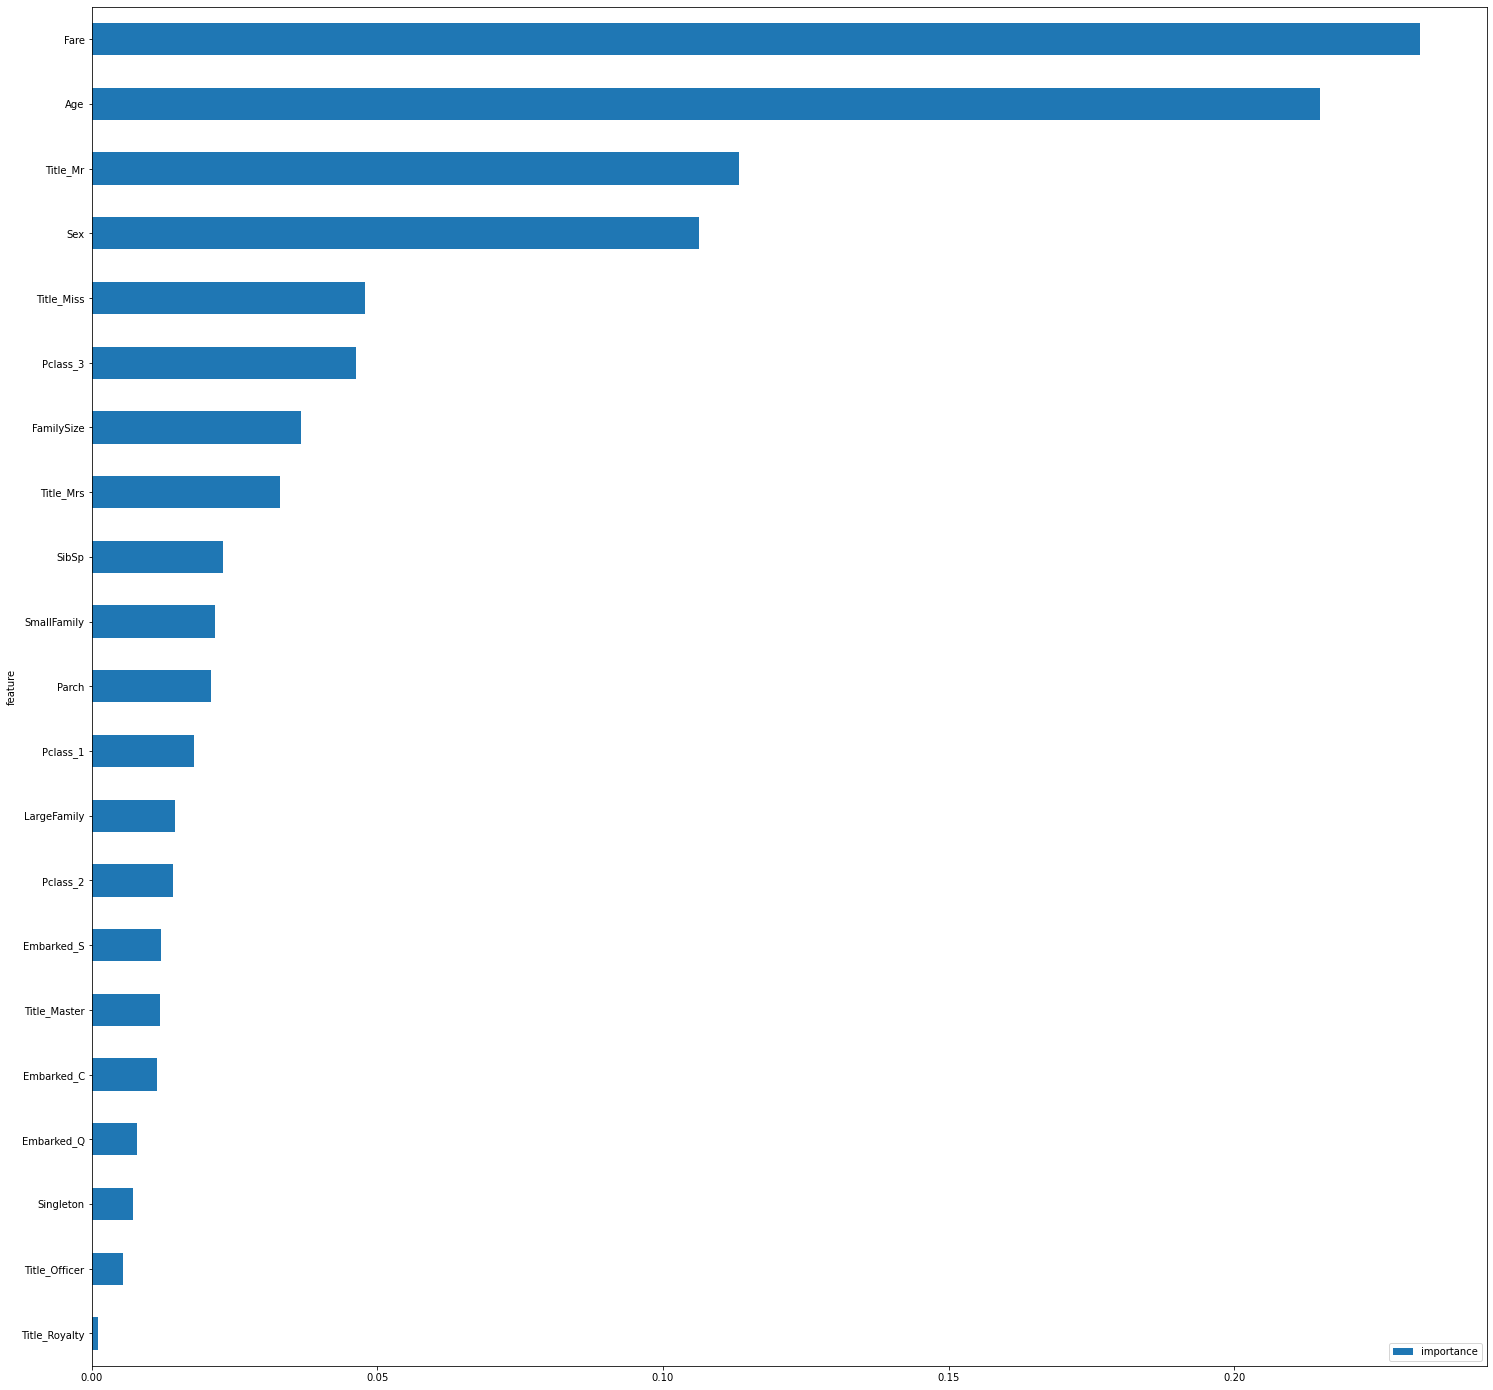

In [132]:
features.plot(kind='barh', figsize=(25, 25))

In [136]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print (train_reduced.shape)

(891, 5)


In [138]:
test_reduced = model.transform(test)
print (test_reduced.shape)

(418, 5)


In [140]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

In [145]:
for model in models:
    print ('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print ('CV score = {0}'.format(score))
    print ('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return 

CV score = 0.7800263636934279
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return 

CV score = 0.7800263636934279
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector 

CV score = 0.7867428284476807
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return 

CV score = 0.8080848659845585
****


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [147]:
model = GradientBoostingClassifier()
model.fit(train, targets)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier()

In [149]:
model = RandomForestClassifier(n_estimators=150, max_depth=7, random_state=1)
model.fit(train, targets)

<ipython-input-149-13976599812f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train, targets)


RandomForestClassifier(max_depth=7, n_estimators=150, random_state=1)

In [151]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

<ipython-input-151-b658a1bc315c>:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train, targets)


In [152]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('Data_Files/test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('submission.csv', index=False)